## And, Or, Xor, Not problem with Logistic Regression

https://colab.research.google.com/drive/1bxAkIWd9NPK9ZMPU-UWzDIgaWKh0NyGB

In [168]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
plt.style.use("seaborn-talk")
%matplotlib inline
warnings.filterwarnings("ignore")

#### sigmoid function 

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def tenh(x):
    z = np.exp(2*x)
    return (z-1)/(z+1)

#### Y = MX + C //create liner hypothysis

In [3]:
def hypothysis(x, w):
    return np.dot(x, w)

#### Entropy for error

In [42]:
def error_function(y, y_cap):
    error = ((-y*np.log(y_cap)-(1-y)*np.log(1-y_cap))**2).mean()
    return error

#### Gradient Decend for optimization 

In [64]:
def gradient_decent(x, y, y_cap, alpha=0.2):
    return alpha*(x.T@(y_cap - y).T)/len(y)

#### calculate the weight 

In [172]:
def calculate_weight(x, y, weight=np.array([1, 1, 1])):
    for z in np.arange(1,0.00001,-0.0001):
        Y = hypothysis(x, weight)
        y_cap = sigmoid(Y)
        error = error_function(y, y_cap)
        weight = weight - gradient_decent(x, y, y_cap,z)
    return weight, error

#### Calculate weight for Not , And, Or

In [173]:
INPUT = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]])


NOT_weight, error = calculate_weight(
    np.array([[1, 1], [1, 0]]), np.array([0, 1]), np.array([1,1]))

print("NOT Weight", NOT_weight)
print("NOT Error", error, end="\n\n")

AND = np.array([0, 0, 0, 1])
AND_weight, error = calculate_weight(INPUT, AND, np.array(
    [0,  0,  0]))
print("AND Weight", AND_weight)
print("AND Error", error, end="\n\n")


OR = np.array([0, 1, 1, 1])
OR_weight, error = calculate_weight(
    INPUT, OR, np.array([0, 0, 0]))
print("OR Weight", OR_weight)
print("OR Error", error,end="\n\n")


NOT Weight [  6.71943082 -13.84480964]
NOT Error 1.051109883921009e-06

AND Weight [-16.18491704  10.67722774  10.67722774]
AND Error 1.6230476032234033e-05

OR Weight [-5.50794637 11.93488862 11.93488862]
OR Error 5.398851621743304e-06



In [174]:
def Predict(x, w):
    return sigmoid(hypothysis(x, w))

#### Create funtion for all types of gate 

In [157]:
def not_gate(x):
    return Predict(np.array([1, x]), NOT_weight)


def and_gate(x, y):
    return Predict(np.array([1, x, y]), AND_weight)


def or_gate(x, y):
    return Predict(np.array([1, x, y]), OR_weight)


def xor_gate(x, y):
    return or_gate(and_gate(not_gate(x), y), and_gate(x, not_gate(y)))

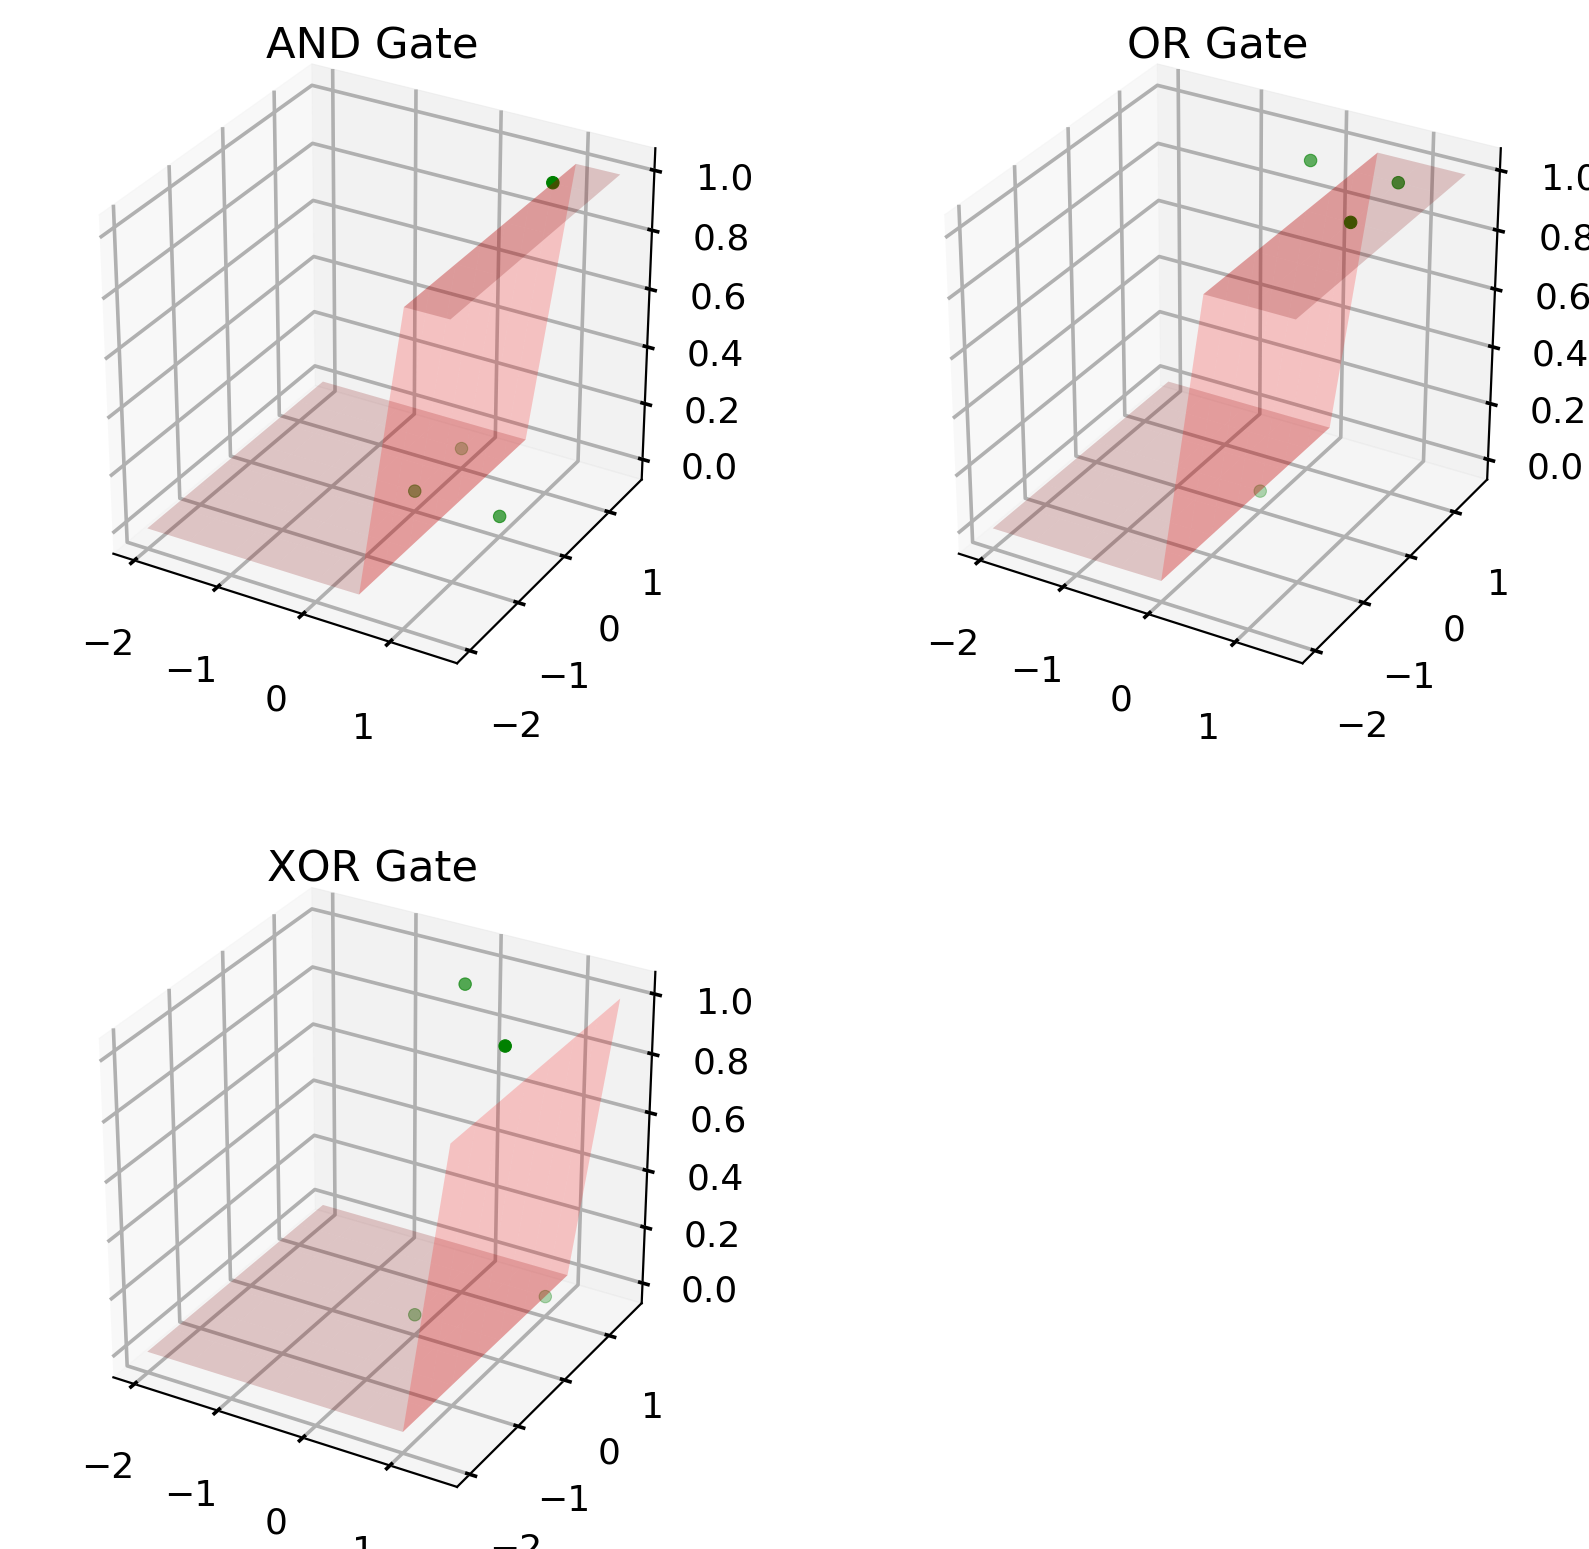

In [158]:
fig = plt.figure(figsize=(10, 10), dpi=200)
Input = [[0, 0], [0, 1], [1, 0], [1, 1]]
ax = plt.subplot(221, projection="3d")
ax.scatter(INPUT[:, 1:2], INPUT[:, 2:3], AND, s=20, c='g', label="Data points")
ax.set(
    facecolor="white",
    title="AND Gate"
)
X = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(X, X)
Z = np.array([[and_gate(z, z) for z in i] for i in X])
ax.plot_surface(X, Y, Z, alpha=0.2, color="r")


ax = plt.subplot(222, projection="3d")
ax.scatter(INPUT[:, 1:2], INPUT[:, 2:3], OR, s=20, c='g', label="Data points")
ax.set(
    facecolor="white",
    title="OR Gate",
)
X = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(X, X)
Z = np.array([[or_gate(z, z) for z in i] for i in X])
ax.plot_surface(X, Y, Z, alpha=0.2, color="r")


ax = plt.subplot(223, projection="3d")
ax.scatter(INPUT[:, 1:2], INPUT[:, 2:3], [0, 1, 1, 0], s=20, c='g')
ax.set(
#     facecolor="white",
    title="XOR Gate"
)
X = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(X, X)
Z = np.array([[xor_gate(z, z) for z in i] for i in X])
ax.plot_surface(X, Y, Z, alpha=0.2, color="r")

In [171]:
and_gate(1,1)

0.9985946003855086